In [6]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
%matplotlib inline

In [8]:
train=pd.read_csv('titanic_train.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

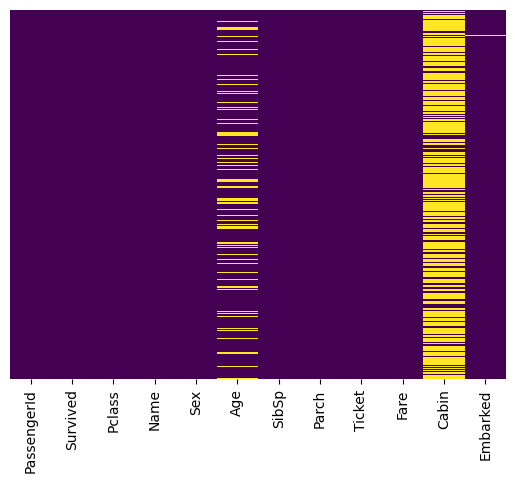

In [19]:
sns.heatmap(train.isnull(),yticklabels = False,cbar= False,cmap ='viridis')


In [20]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

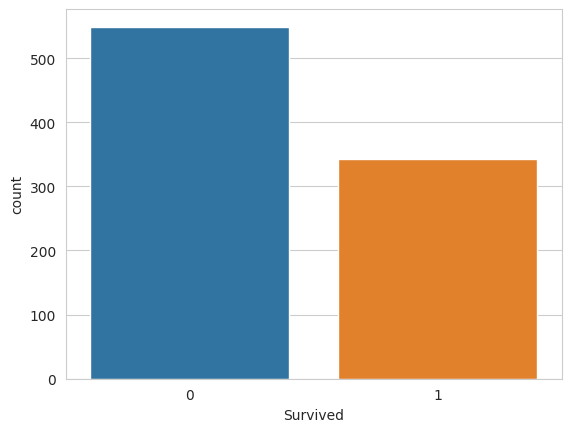

In [21]:
sns.countplot(x='Survived',data=train )

<Axes: xlabel='Survived', ylabel='count'>

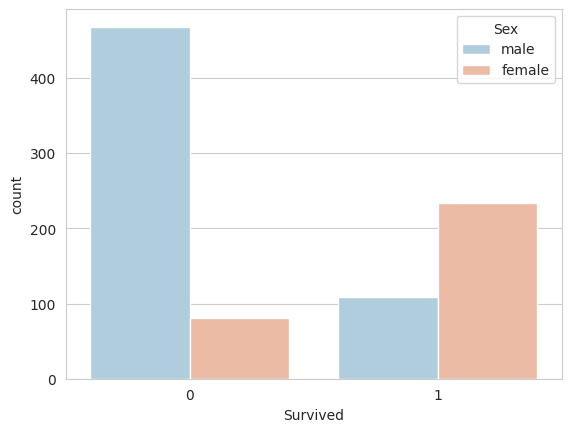

In [23]:
sns.countplot(x='Survived',data=train ,hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

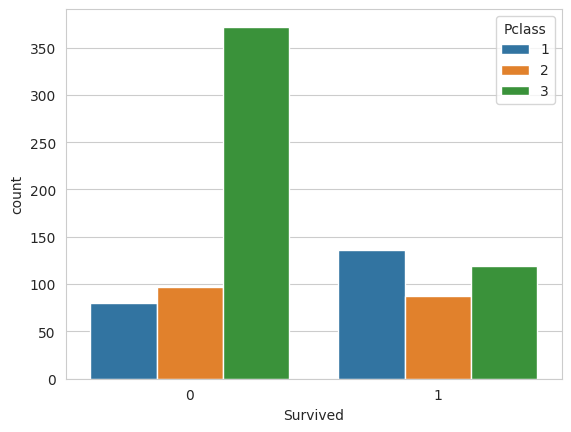

In [25]:
sns.countplot(x='Survived',data=train ,hue='Pclass')

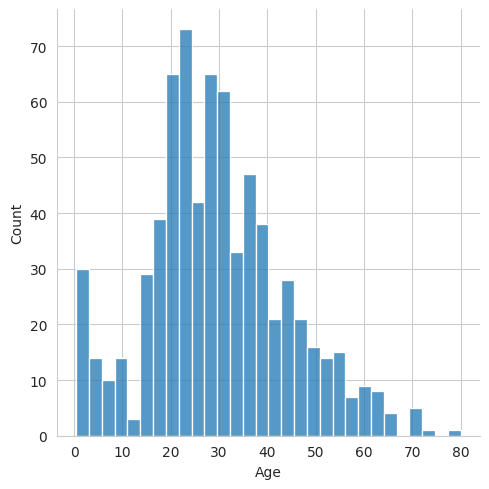

In [27]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

<Axes: ylabel='Frequency'>

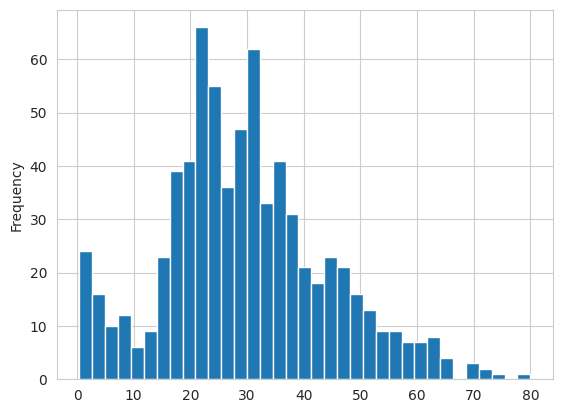

In [31]:
train['Age'].plot.hist(bins=35)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

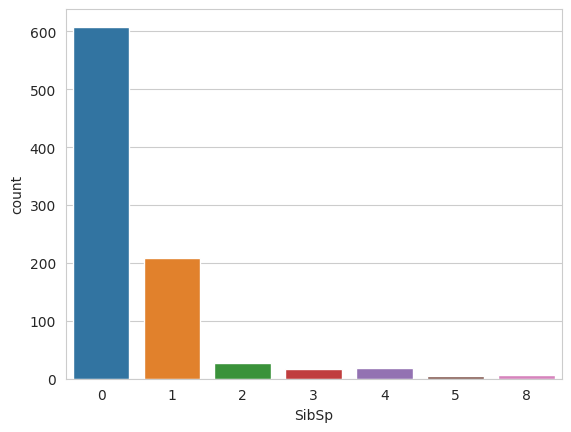

In [34]:
sns.countplot(x='SibSp',data=train)

<Axes: ylabel='Frequency'>

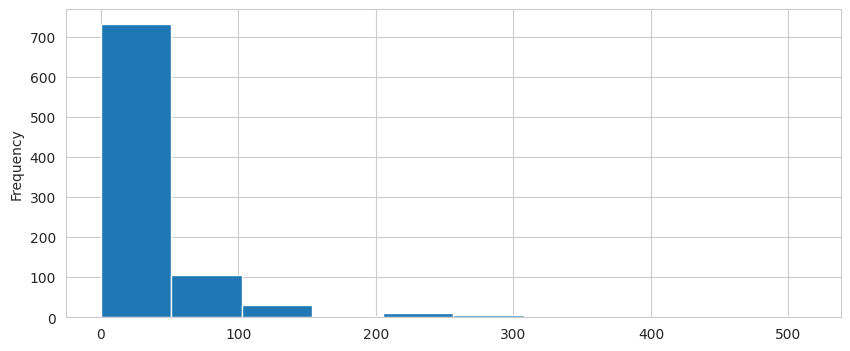

In [37]:
train['Fare'].plot.hist(figsize=(10,4))

In [41]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 KB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67918 sha256=92544be173f31a6812b91c298bd60458bbb89c20be59fd35c9c8a99b76efb33b
  Stored in directory: /home/awnish/.cache/pip/wheels/09/8a/6b/cbe3e87b2e59bb5f90b49b034ce36b80b46a4d6e38444c34de
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [42]:
import cufflinks as cf

In [43]:
cf.go_offline()

In [44]:
train['Fare'].iplot(kind='hist',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

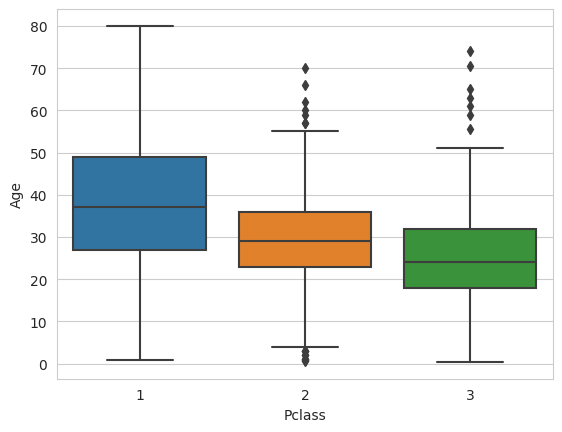

In [49]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [57]:
def impute_age(cols):
    Age =cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [58]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

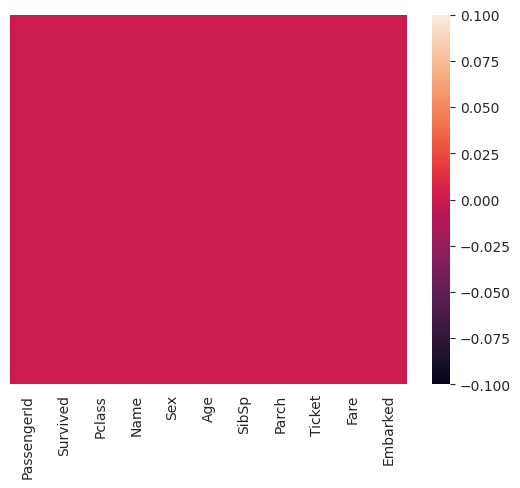

In [66]:
sns.heatmap(train.isnull(),yticklabels=False,cbar='viridis')

In [61]:
train.drop('Cabin',axis=1,inplace=True)

In [65]:
train.dropna(inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
#now we will create dummy variable (beacuse Machine will not understand staing value for \
#e.g sex col have both MALE and FEMALE ,so we have to convert male to 0 and female to 1)so that it is easy for machine
#and this can be done by using pandas module



In [75]:
 sex = pd.get_dummies(train['Sex'],drop_first=True)

In [74]:
embark=pd.get_dummies(train['Sex'],drop_first=True)

In [76]:
train=pd.concat([train,sex,embark],axis=1)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,NaN


In [80]:
#train.drop(['Sex','Embarked','Name']),axis=1,inplace=True// helps in dropping the column name


In [ ]:
#now its time to train the model 

In [81]:
x = train.drop('Survived',axis=1)

In [82]:
y = train['Survived']

In [84]:
y.head()


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64